# DFS

### 스택 stack
- 후입 선출 자료구조. ex) 총의 탄창, 뒤로가기 버튼 구현 등

>class를 활용한 스택의 직접 구현 코드 (참고)

In [10]:
class Stack:
    def __init__(self,n):
        self.top = -1
        self.stack = [0]*n

    def push(self,data):
        if self.top == len(self.stack) - 1:
            return None
        self.top += 1
        self.stack[self.top] = data

    def pop(self):
        if self.top == -1:
            return None
        self.top -= 1
        return self.stack[self.top+1]

my_stack = Stack(10)
my_stack.push('alex')
print(my_stack)
print(my_stack.pop())
print(my_stack)

alex


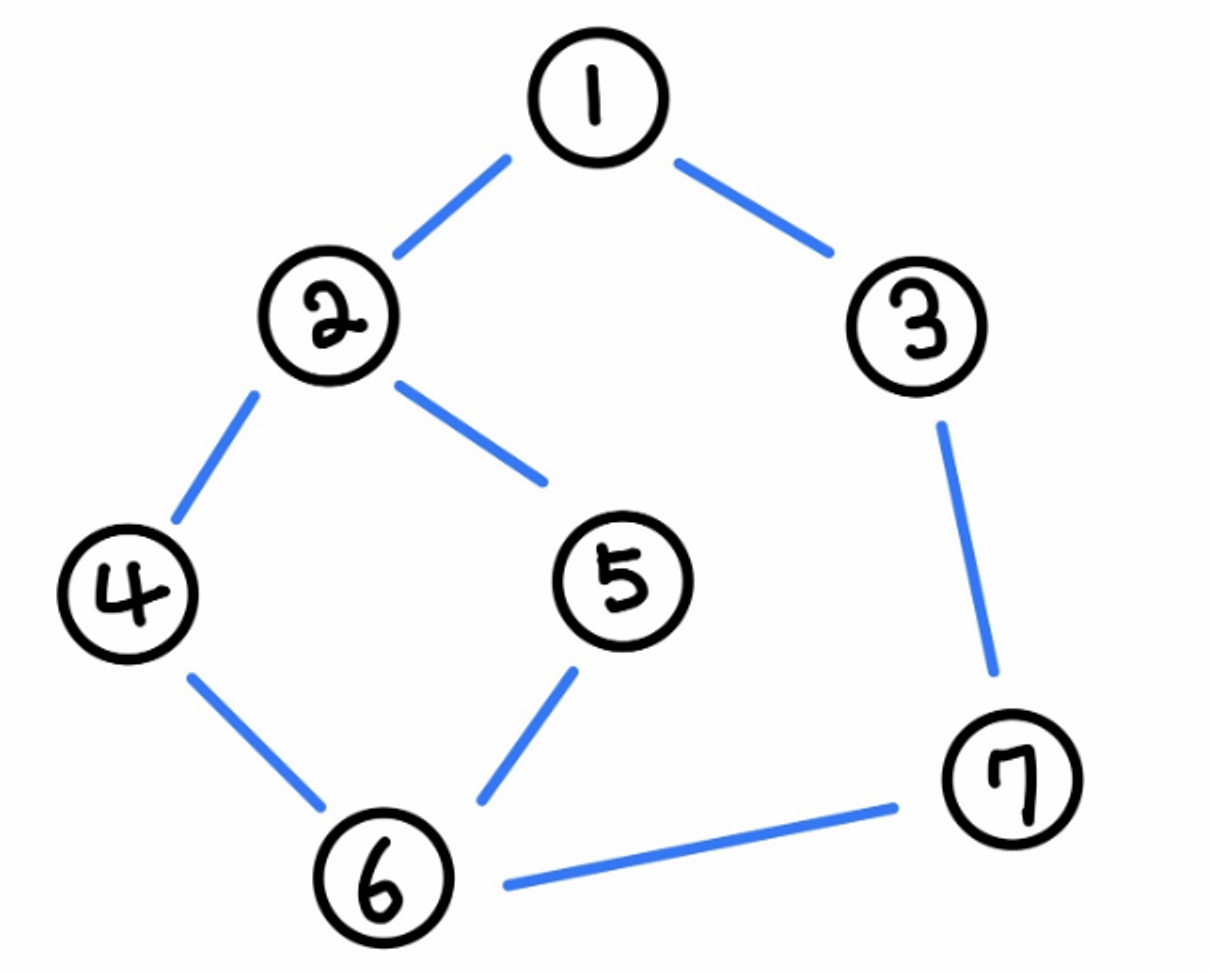

### 인접 행렬
- 가중치 업데이트 시 편리
- 인덱스 활용 가능

In [1]:
V, E = map(int, input().split())  # Vertex(포도알), Edge(선) 갯수

adj_matrix = [[0] * (V + 1) for _ in range(V + 1)]  # 인접행렬 기본틀 + 0번 포도알은 안씀

for _ in range(E):  # 간선 갯수만큼 돌면서 연결 정보를 받음
    start, end = map(int, input().split())  # 시작점과 끝점
    adj_matrix[start][end] = 1
    adj_matrix[end][start] = 1  # 양방향 그래프니까!!

# adj_matrix print 결과

# [[0, 0, 0, 0, 0, 0, 0, 0],  => 0번 포도알은 존재하지 않음
#  [0, 0, 1, 1, 0, 0, 0, 0],  => 1번 포도알은 2, 3번으로 갈 수 있음
#  [0, 1, 0, 0, 1, 1, 0, 0],  => 2번 포도알은 1, 4, 5번 가능
#  [0, 1, 0, 0, 0, 0, 0, 1],  => 3번 포도알은 1, 7번 가능
#  [0, 0, 1, 0, 0, 0, 1, 0],  => 4번 포도알은 2, 6번 가능
#  [0, 0, 1, 0, 0, 0, 1, 0],  => 5번 포도알은 2, 6번 가능
#  [0, 0, 0, 0, 1, 1, 0, 1],  => 6번 포도알은 4, 5, 7번 가능
#  [0, 0, 0, 1, 0, 0, 1, 0]]  => 7번 포도알은 3, 6번 가능

### 인접 리스트
- 공간복잡도 측면에서 효율적
- 가중치 업데이트 시 비효율적

In [ ]:
V, E = map(int, input().split())

adj_list = [[] for _ in range(V + 1)]

for _ in range(E):
    start, end = map(int, input().split())
    adj_list[start].append(end)
    adj_list[end].append(start)  # 양방향

# adj_list = [[], [2, 3], [1, 4, 5], [1, 7], [2, 6], [2, 6], [4, 5, 7], [6, 3]]

> 스택 + 인접 행렬
- 공간 복잡도 높으나, 단방향 그래프인 경우 전치로 방향 전환 유리

In [ ]:
V, E = map(int, input().split())  # Vertex, Edge 갯수

adj_matrix = [[0] * (V + 1) for _ in range(V + 1)]  # 인접행렬 기본틀

for _ in range(E):  # 간선 갯수만큼 돌면서 연결 정보를 받음
    start, end = map(int, input().split())  # 시작점과 끝점
    adj_matrix[start][end] = 1
    adj_matrix[end][start] = 1  # 양방향 그래프니까!!

stack = [1]  # 맨처음 시작점은 1번 포도알
visited = []  # 궤적 기록용

while stack:  # 스택이 빌때까지 돌아라!
    current = stack.pop()  # 우선 스택에서 현재 위치 하나 뽑고
    if current not in visited:  # 방문하지 않은 곳이라면,
        visited.append(current)  # 방문했다고 체크해줌
		
		# 위의 if문 안으로 넣으면 더 좋습니다.
    for destination in range(V+1):  # current 입장에서 어디로 갈 수 있는지 모조리 체크
        if adj_matrix[current][destination] and destination not in visited:  # 갈수있고 + 방문 안했으면!
            stack.append(destination)  # 다음 갈 곳으로 Stack에 저장

print('이동경로:', *visited)

# 이동경로: 1 3 7 6 5 2 4

> 스택 + 인접 리스트
- 공간 복잡도 낮음

In [ ]:
V, E = map(int, input().split())  # Vertex, Edge 갯수

adj_list = [[] for _ in range(V + 1)]  # 인접리스트 기본틀

for _ in range(E):  # 간선 갯수만큼 돌면서 연결 정보를 받음
    start, end = map(int, input().split())  # 시작점과 끝점
    adj_list[start].append(end)
    adj_list[end].append(start)  # 양방향 그래프니까!!

stack = [1]  # 맨처음 시작점은 1번 포도알
visited = []  # 궤적 기록용

while stack:  # 스택이 빌때까지 돌아라!
    current = stack.pop()  # 우선 스택에서 현재 위치 하나 뽑고
    if current not in visited:  # 방문하지 않은 곳이라면,
        visited.append(current)  # 방문했다고 체크해줌

    for destination in adj_list[current]:
        if destination not in visited:  # 갈 수 있고 + 방문 안했으면!
            stack.append(destination)  # 다음 갈 곳으로 Stack에 저장

print('이동경로:', *visited)

# 이동경로: 1 3 7 6 5 2 4

> 재귀 + 인접 행렬
- 가독성 good
- 속도는 재귀라서 느림

In [ ]:
def dfs(n):
    if n not in visited:  # 우선 visited 없으면 넣어줌
        visited.append(n)

    for destination in range(V+1):
        if adj_matrix[n][destination] and destination not in visited:
            dfs(destination)  # 다음 재귀 깊이로 이동

V, E = map(int, input().split())  # Vertex, Edge 갯수

adj_matrix = [[0] * (V + 1) for _ in range(V + 1)]  # 인접행렬 기본틀

for _ in range(E):  # 간선 갯수만큼 돌면서 연결 정보를 받음
    start, end = map(int, input().split())  # 시작점과 끝점
    adj_matrix[start][end] = 1
    adj_matrix[end][start] = 1  # 양방향 그래프니까!!

visited = []  # 궤적 기록용

dfs(1)  # 1번 포도알부터 시작!

print('이동경로:', *visited)

# 이동경로: 1 2 4 6 5 7 3 => 이거 다른거 주의!!
# main이 종료되어야 sub가 실행된다는 것을 생각
# 다음 main은 이전 main의 sub임
# (main) (sub1) (sub2) ...
# 1
# 1-2 / 1-3
# 1-2-4 / 1-2-5 / 1-3
# 1-2-4-6 / 1-2-4-5 / 1-2-5 / 1-3
# 1-2-4-6-5 / 1-2-4-6-7 / 1-3 # main이 5를 갔으니 sub 1-2-5, sub 1-2-4-5는 시작도 못함
# (1-2-4-6-5) / 1-2-4-6-7 / 1-3 # main 종료 및 기록됨, 이전 main 1-2-4-6이 main이 됨
# (1-2-4-6-5)-7 / 1-3 # main이 7을 갔으니 sub 1-2-4-6-7은 시작도 못함
# (1-2-4-6-5)-7-3 # main이 3을 갔으니 sub 1-3은 시작도 못함
# main 종료, sub는 없음